# Image Processing using skimage

## Displaying Images

In [11]:
from skimage.io import imread
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Display images from skimage

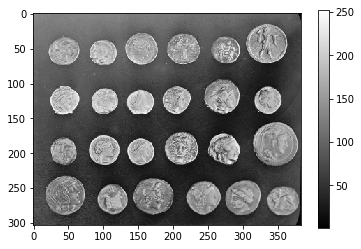

In [8]:
from skimage import data
coins = data.coins()
imgplot = plt.imshow(coins, cmap='gray')
plt.colorbar() # plot a color bar


# cmap can be ['Set1', 'Set2', 'Set3', 'hot', 'nipy_spectral', 'gray']
# see more https://matplotlib.org/examples/color/colormaps_reference.html

### Image Slicing

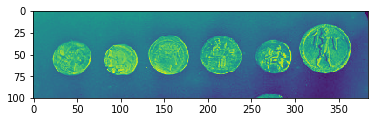

In [9]:
# show only first row of coins
coins2 = coins[:100]
imgplot = plt.imshow(coins2)

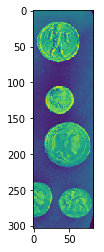

In [10]:
# show only last row of coins
coins2 = coins[:, 300:]
imgplot = plt.imshow(coins2)

### Display external images

https://matplotlib.org/users/image_tutorial.html

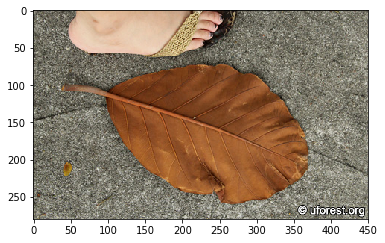

In [3]:
egimage = 'http://uforest.org/images/artocarpus_elasticus2.jpg'
img = imread(egimage) # render image as numpy array
plt.imshow(img)
plt.show()

### Convert color to grayscale
Most image processing algorithms assume a two dimensional matrix, not an image with the third dimension of color. To bring the image into two dimensions, we need to summarize the three colors into a single value.

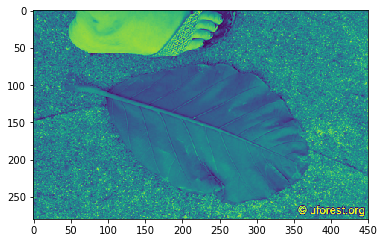

In [5]:
from skimage.color import rgb2gray

img_gray = rgb2gray(img)
plt.imshow(img_gray)
plt.show()

# luminance preservation is observed
# more conversion options http://scikit-image.org/docs/dev/api/skimage.color.html

In [39]:
img_gray.shape

(512, 512)

## Transform Image
http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.rescale

In [7]:
from skimage.transform import *

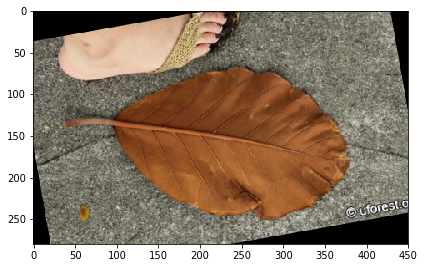

In [40]:
# rotation
img_r = rotate(img, 10) # angle anti-clockwise
io.imshow(img_r)

/Users/siyang/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


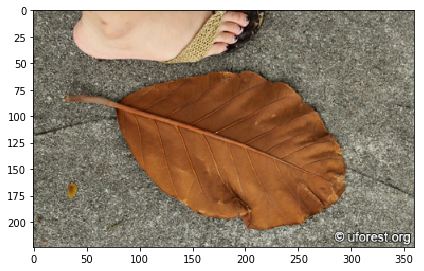

In [36]:
# Resize
img_rescale = rescale(img, 0.8) #resize factor
io.imshow(img_rescale)


## Save Image

In [ ]:
io.imsave(r'/Users/jake/Desktop/planet2.png', img_gray)

## Data Descriptions

In [42]:
# data type
print(type(img))

# height x width x rbg (for color images)
print('color:', img.shape)
print('grey scale:', img_gray.shape)

# pixel count
print(img.size)

# data type
print(img.dtype)

<class 'numpy.ndarray'>
color: (512, 512, 3)
grey scale: (512, 512)
786432
uint8


In [13]:
# display values of each grayscaled pixel in a pandas matrix
import pandas as pd
df = pd.DataFrame(coins)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,47,123,133,129,137,132,138,135,134,133,...,104,101,100,90,96,44,7,14,3,12
1,93,144,145,143,145,132,135,133,134,133,...,101,99,97,98,92,75,17,12,7,7
2,126,147,143,147,145,132,136,133,134,132,...,97,95,92,96,87,91,39,2,13,3
3,131,136,133,139,136,130,138,133,133,131,...,93,91,90,89,88,82,68,3,15,7
4,131,133,134,135,129,130,137,128,132,130,...,91,87,89,87,88,77,88,28,8,12


## Image Inversion

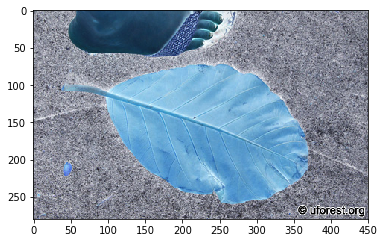

In [71]:
from skimage import util

inverted_img = util.invert(img)
plt.imshow(inverted_img)

## Binary Conversion

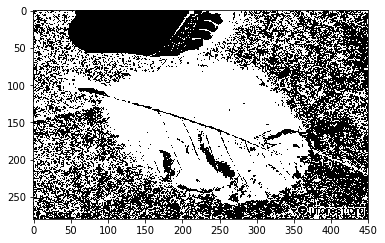

In [77]:
binary_img = np.where(img_gray > np.mean(img_gray),1.0,0.0)
plt.imshow(binary_img, cmap='gray')

## Corner Detection

## Edge Detection

In [7]:
from skimage import data, io, filters

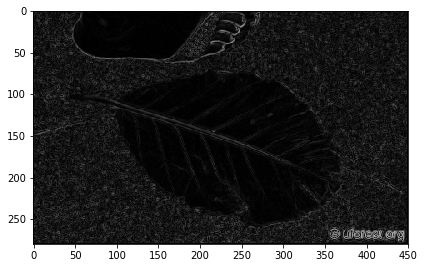

In [70]:
# using Sobel
edges = filters.sobel(img_gray)
io.imshow(edges)
io.show()

## Template Matching (Single Match)
Detecting back button on a computer screenshot

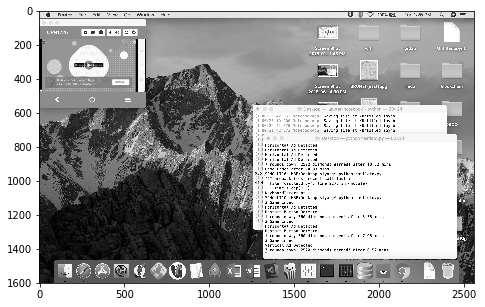

In [59]:
# Open game window screenshot
game = 'Screen Shot 2018-06-05 at 1.25.02 PM.png'
game = imread(game)
# change to grey scale
game = rgb2gray(game)

# plot
plt.figure(figsize=(28, 5))
plt.imshow(game, cmap=plt.cm.gray);

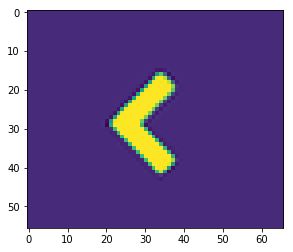

In [60]:
# template to search in screenshot
back = 'back.png'
back = imread(back)
# change to grey scale
back = rgb2gray(back)

# plot
plt.imshow(back);

In [61]:
from skimage.feature import match_template

result = match_template(game, back)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

# this gives the top left corner of the match
print(x,y)

# calculate the centre coordinates of the match
h, w = back.shape
x = int(x+h/2)
y = int(y+w/2)
print(x,y)

74 492
102 525


#### Match With First Screenshot

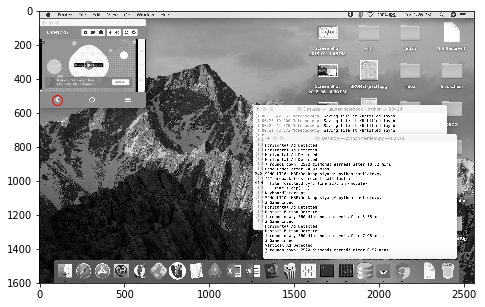

In [62]:
plt.figure(figsize=(28, 5))
plt.imshow(game, cmap=plt.cm.gray)

# highlight matched region
plt.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10);

#### Match With Second Screenshot
It works!

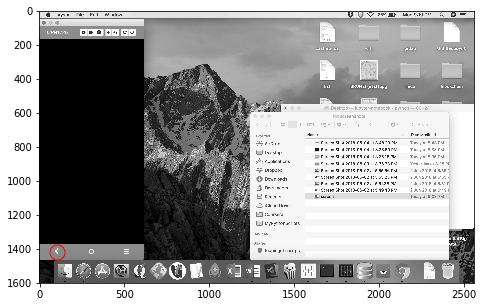

In [65]:
# Test with another screenshot
game = 'Screen Shot 2018-06-04 at 9.19.08 PM.png'
game = imread(game)
# change to grey scale
game = rgb2gray(game)

result = match_template(game, back)
ij = np.unravel_index(np.argmax(result), result.shape)
# this gives the top left corner of the match
x, y = ij[::-1]

# calculate the centre coordinates of the match
h, w = back.shape
x = int(x+h/2)
y = int(y+w/2)

# plot screenshot
plt.figure(figsize=(28, 5))
plt.imshow(game, cmap=plt.cm.gray)

# highlight matched region
plt.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=15);

### Template Matching (Multi-Match)
Sklearn documentation does not provide a guide on multi-template matching, but it is not that difficult using numpy, either providing a threshold value, or select the top matches. The latter is being shown here.

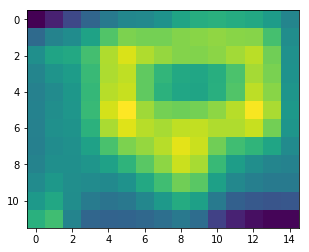

In [12]:
img = 'Screen Shot 2018-06-02 at 5.49.48 PM.png'
button = (10,210,1240,690)
img = imread(img)
cropped = img[220:650, 10:1230]
sign = img[415:427, 320:335]
sign = rgb2gray(sign)
cropped = rgb2gray(cropped)

# this is the template to match
plt.imshow(sign);

In [37]:
# Template matching, results gives a correlation coefficient for all pixels in image
result = match_template(cropped, sign)
# Flatten, sort, and top 15 values'
d = result.flatten()
e = np.sort(d)[::-1][:15]

# shows correlation result, more correlated when near to 1, exact match is 1
print('Correlation Coefficient')
print(e,'\n')

# extract all coordinates
list = []
for i in e:
    # locate indexes from top 10 values
    top = np.argwhere(d==i)[0][0]
    # obtain coordinates from index
    ij = np.unravel_index(top, result.shape)
    # swap position as it is in (y, x)
    x, y = ij[::-1] 
    list.append((x,y))

# however looking at the exact coordinates, you realised that some coordinates are very closed together
# and should be consider as duplicates
print('Exact Coordinates in Picture')
print(list)

Correlation Coefficient
[ 1.          0.93721437  0.93459643  0.92935052  0.9226862   0.92201768
  0.91195638  0.90761017  0.90602209  0.89382324  0.89173535  0.88718091
  0.88694637  0.88587689  0.87172441] 

Exact Coordinates in Picture
[(310, 195), (505, 301), (933, 355), (148, 294), (1030, 300), (230, 353), (934, 355), (1030, 299), (230, 352), (148, 295), (311, 195), (309, 195), (504, 301), (229, 353), (506, 301)]


In [38]:
# remove all duplicates
list2 = list
value = 5
for i in list:
    x = i[0]
    y = i[1]

    for i2 in list:
        x2 = i2[0]
        y2 = i2[1]
        # if same coordinates do not remove as comparing same point
        if x-x2 == 0 and y-y2 == 0:
            continue
        # if coordinates are very similar, likely to be duplicates; remove
        elif -value <= x-x2 <= value and -value <= y-y2 <= value:
            list2.remove(i2)
            
print('number matches remain:', len(list2), '\n', list2)

number matches remain: 6 
 [(505, 301), (933, 355), (148, 294), (1030, 300), (230, 353), (309, 195)]


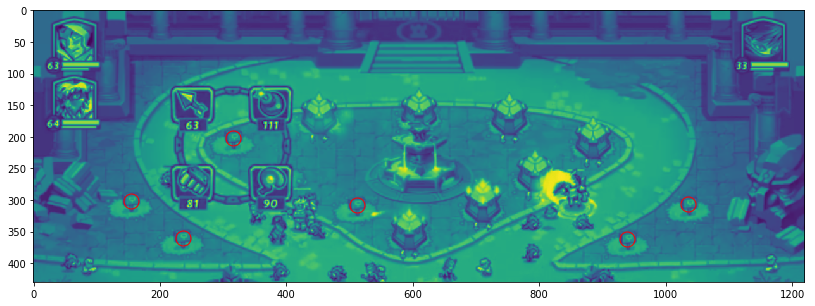

In [39]:
# Draw screenshot
plt.figure(figsize=(18, 5))
plt.imshow(cropped)


# Template matching
result = match_template(cropped, sign)
# Flatten, sort, and top 10 values'
d = result.flatten()
e = np.sort(d)[::-1][:10]


# iterate drawing for each match
for x, y in list2:
    # get centre of coordinates
    h, w = sign.shape
    x = int(x+h/2)
    y = int(y+w/2)

    plt.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=15)

## Resources
 * http://scikit-image.org
 * http://blog.yhat.com/posts/image-processing-with-scikit-image.html
 * http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_template.html